In [1]:
import numpy as np
import random
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import functools as ft
import collections as cls
from collections import Counter 

def stat_method(function, iterations=100000):
    counter, x, y  = [], [], []
    for i in range(iterations):
        function(counter, x, y)
    df = pd.DataFrame({
        'x': x,
        'y': y,
        'target': counter
    })
    return df


def stats(counter, factor=None, title='Data Statistics'):
    counter = Counter(counter)
    amount = sum(counter.values())
    new_counter = { 'amount': amount}
    print('----- '+ title +' -----')
    for value in counter:
        share = counter[value] / amount
        print('Share for value "' + str(value) + '": ' + str(share))
        new_counter[value] = { 
            'amount': counter[value],
            'share': share
        }
    if factor:
        print('Area: ' + str(new_counter['in']['share'] * factor))
    print((len(title) + 12) * '-')
    return new_counter
    
    
def count_visualise(counter, labels={'x': 'First feature', 'y': 'Second feature'}, type='both'):
    if type == 'both':
        _, axes = plt.subplots(1, 2, figsize=(18, 9))
        index = [0, 1]
    else:
        _, axes = plt.subplots(figsize=(7, 7))
        index = [0]
    
    if type == 'both' or type == 'one':
        values_counter = sns.countplot(counter['target'], color='#999999', ax=axes if type != 'both' else axes[0])
        values_counter.set_xlabel('Values')
        values_counter.set_ylabel('Number of values')
        values_counter.set_title('Count different values')
    if type == 'both' or type == 'two':
        scatter_values = sns.scatterplot(x='x', y='y', hue='target', data=counter, ax=axes if type != 'both' else axes[1], s=20)
        scatter_values.set_xlabel(labels['x'])
        scatter_values.set_ylabel(labels['y'])
        scatter_values.set_title('Show values on plane')
        scatter_values.set_aspect('equal')

----- Data Statistics -----
Share for value "in": 0.78651
Share for value "out": 0.21349
Area: 0.78651
---------------------------


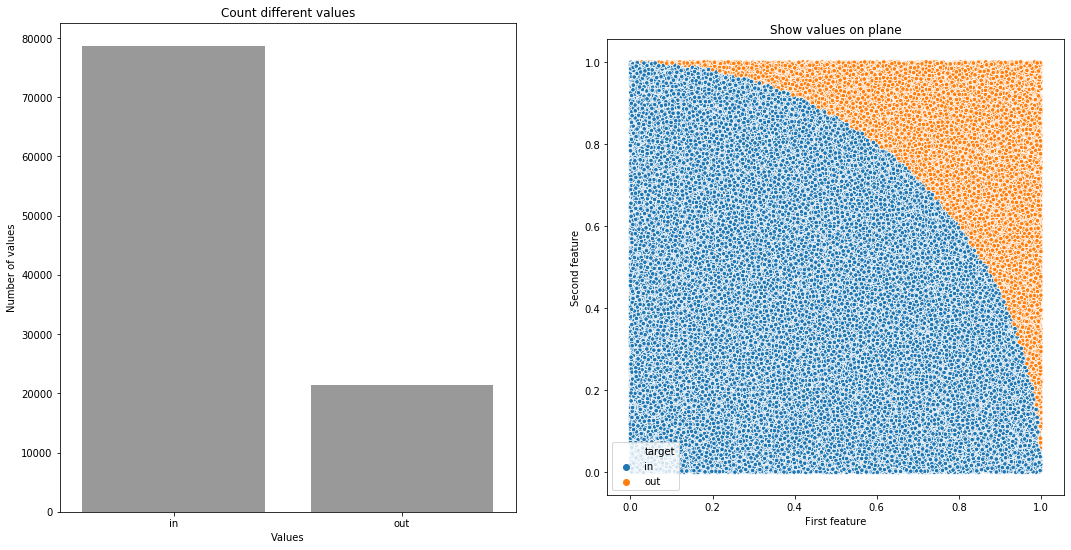

In [2]:
def quadrant(counter, x, y, target):
    coordinate_1 = random.random() * target
    coordinate_2 = random.random() * target
    predict = np.sqrt(coordinate_1 ** 2 + coordinate_2 ** 2)
    counter.append('in' if predict <= target else 'out') 
    x.append(coordinate_1)
    y.append(coordinate_2)

    
target = 1    
counter = stat_method(function=ft.partial(quadrant, target=target))
stats(counter['target'], target ** 2)
count_visualise(counter)

----- Data Statistics -----
Share for value "out": 0.35823
Share for value "in": 0.64177
Area: 2.0161799172943216
---------------------------


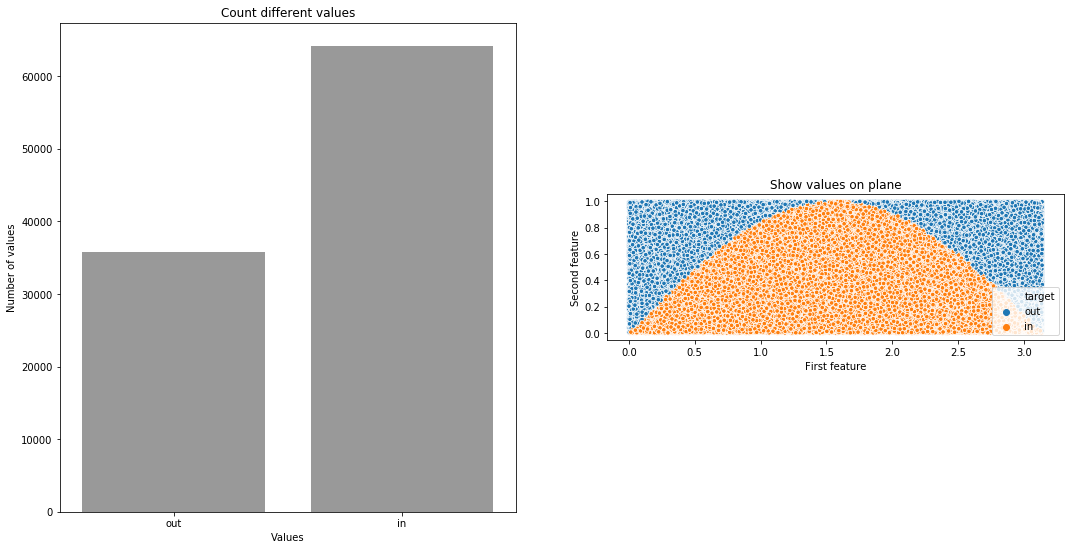

In [3]:
def target_sin(counter, x, y, border):
    coordinate_1 = random.random() * border
    predict = random.random()
    target = np.sin(coordinate_1)
    counter.append('in' if predict <= target else 'out') 
    x.append(coordinate_1)
    y.append(predict)
    
counter = stat_method(function=ft.partial(target_sin, border=np.pi))
stats(counter['target'], np.pi)
count_visualise(counter)

----- Data Statistics -----
Share for value "in": 0.78264
Share for value "out": 0.21736
Area: 1.56528
---------------------------


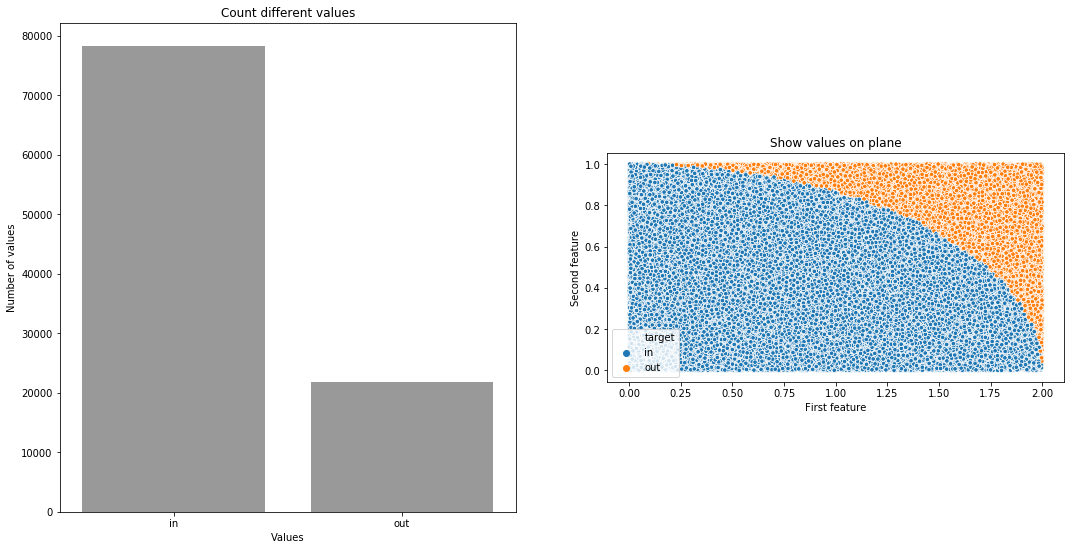

In [4]:
def elips(counter, x, y, a, b):
    coordinate_1 = random.random() * a
    coordinate_2 = random.random() * b
    predict = (coordinate_1 / a) ** 2 + (coordinate_2 / b) ** 2
    counter.append('in' if predict <= 1 else 'out') 
    x.append(coordinate_1)
    y.append(coordinate_2)
    
a, b = 2, 1  
counter = stat_method(function=ft.partial(elips, a=a, b=b))
statistics = stats(counter['target'], a * b)
count_visualise(counter)

----- Data Statistics -----
Share for value "miss": 0.56405
Share for value "Hi!": 0.43595
---------------------------


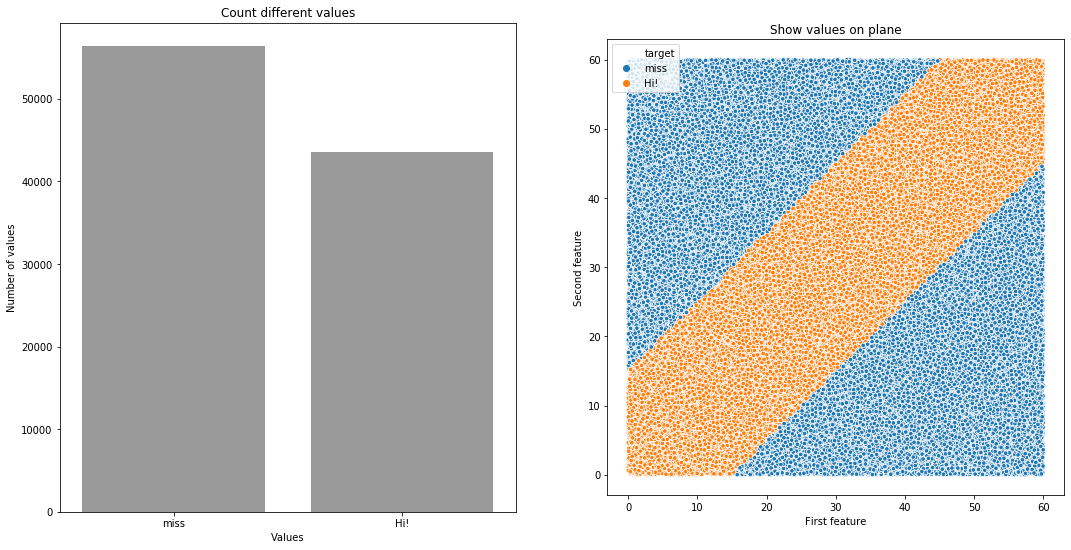

In [5]:
def hi_miss(counter, x, y, time, waiting):
    coordinate_1 = random.random() * time
    coordinate_2 = random.random() * time
    predict = np.abs(coordinate_1 - coordinate_2)
    counter.append('Hi!' if predict <= waiting else 'miss') 
    x.append(coordinate_1)
    y.append(coordinate_2)

counter = stat_method(function=ft.partial(hi_miss, time=60, waiting=15))
stats(counter['target'])
count_visualise(counter)

In [6]:
x, y = list(range(1, 61)), []
for i in x:
    counter = stat_method(function=ft.partial(hi_miss, time=60, waiting=i))
    statistics = stats(counter['target'])
    y.append(statistics['Hi!']['share'])

----- Data Statistics -----
Share for value "miss": 0.9669
Share for value "Hi!": 0.0331
---------------------------
----- Data Statistics -----
Share for value "miss": 0.93556
Share for value "Hi!": 0.06444
---------------------------
----- Data Statistics -----
Share for value "miss": 0.90293
Share for value "Hi!": 0.09707
---------------------------
----- Data Statistics -----
Share for value "miss": 0.87131
Share for value "Hi!": 0.12869
---------------------------
----- Data Statistics -----
Share for value "miss": 0.83834
Share for value "Hi!": 0.16166
---------------------------
----- Data Statistics -----
Share for value "miss": 0.81052
Share for value "Hi!": 0.18948
---------------------------
----- Data Statistics -----
Share for value "miss": 0.78037
Share for value "Hi!": 0.21963
---------------------------
----- Data Statistics -----
Share for value "miss": 0.75216
Share for value "Hi!": 0.24784
---------------------------
----- Data Statistics -----
Share for value "miss"

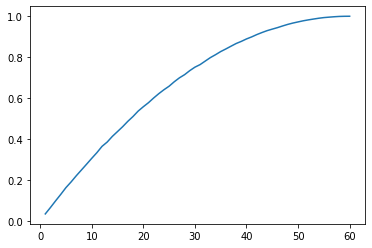

In [7]:
plt.plot(x, y)

In [8]:
def choice(counter, x, y):
    born = random.choice(['boy', 'girl'])
    counter.append(born) 
    x.append(born)
    y.append(born)
    

boys = 1359671
girls = 1285086
amount = boys + girls
practice_ver = boys / amount
vera = [practice_ver] 
for i in range(500):
    counter = stat_method(function=ft.partial(choice), iterations=amount)
    statistics = stats(counter['target'], title='Iteration ' + str(i + 1))
    vera.append(statistics['boy']['share'])

----- Iteration 1 -----
Share for value "boy": 0.5000466961614999
Share for value "girl": 0.4999533038385001
-----------------------
----- Iteration 2 -----
Share for value "girl": 0.5000402683497954
Share for value "boy": 0.4999597316502045
-----------------------
----- Iteration 3 -----
Share for value "girl": 0.4997340020274074
Share for value "boy": 0.5002659979725925
-----------------------
----- Iteration 4 -----
Share for value "boy": 0.499938557682237
Share for value "girl": 0.5000614423177631
-----------------------
----- Iteration 5 -----
Share for value "boy": 0.499853105597225
Share for value "girl": 0.500146894402775
-----------------------
----- Iteration 6 -----
Share for value "boy": 0.49966594284465454
Share for value "girl": 0.5003340571553455
-----------------------
----- Iteration 7 -----
Share for value "girl": 0.4999211647799779
Share for value "boy": 0.500078835220022
-----------------------
----- Iteration 8 -----
Share for value "girl": 0.4996901416651889
Share

----- Iteration 62 -----
Share for value "boy": 0.49928518952780915
Share for value "girl": 0.5007148104721908
------------------------
----- Iteration 63 -----
Share for value "boy": 0.5002365056600663
Share for value "girl": 0.49976349433993367
------------------------
----- Iteration 64 -----
Share for value "boy": 0.4997336239208366
Share for value "girl": 0.5002663760791635
------------------------
----- Iteration 65 -----
Share for value "girl": 0.5000425369892205
Share for value "boy": 0.4999574630107794
------------------------
----- Iteration 66 -----
Share for value "boy": 0.5003556092298839
Share for value "girl": 0.49964439077011613
------------------------
----- Iteration 67 -----
Share for value "girl": 0.4997619819136503
Share for value "boy": 0.5002380180863497
------------------------
----- Iteration 68 -----
Share for value "boy": 0.49986558311406304
Share for value "girl": 0.500134416885937
------------------------
----- Iteration 69 -----
Share for value "boy": 0.50

----- Iteration 123 -----
Share for value "girl": 0.50006900444918
Share for value "boy": 0.49993099555082
-------------------------
----- Iteration 124 -----
Share for value "boy": 0.5003616589350175
Share for value "girl": 0.4996383410649825
-------------------------
----- Iteration 125 -----
Share for value "boy": 0.49968295764034276
Share for value "girl": 0.5003170423596572
-------------------------
----- Iteration 126 -----
Share for value "boy": 0.5004085441498028
Share for value "girl": 0.4995914558501972
-------------------------
----- Iteration 127 -----
Share for value "boy": 0.49955591383253733
Share for value "girl": 0.5004440861674626
-------------------------
----- Iteration 128 -----
Share for value "boy": 0.49990112513172286
Share for value "girl": 0.5000988748682771
-------------------------
----- Iteration 129 -----
Share for value "boy": 0.5000410245629372
Share for value "girl": 0.49995897543706286
-------------------------
----- Iteration 130 -----
Share for value

----- Iteration 183 -----
Share for value "girl": 0.49975857895451264
Share for value "boy": 0.5002414210454873
-------------------------
----- Iteration 184 -----
Share for value "boy": 0.49991776182084025
Share for value "girl": 0.5000822381791598
-------------------------
----- Iteration 185 -----
Share for value "boy": 0.49964174402412015
Share for value "girl": 0.5003582559758798
-------------------------
----- Iteration 186 -----
Share for value "boy": 0.49984138429352865
Share for value "girl": 0.5001586157064714
-------------------------
----- Iteration 187 -----
Share for value "girl": 0.5000361091775162
Share for value "boy": 0.4999638908224839
-------------------------
----- Iteration 188 -----
Share for value "girl": 0.5002622169068841
Share for value "boy": 0.49973778309311595
-------------------------
----- Iteration 189 -----
Share for value "boy": 0.5009745696863643
Share for value "girl": 0.4990254303136356
-------------------------
----- Iteration 190 -----
Share for 

----- Iteration 243 -----
Share for value "boy": 0.5001102180654026
Share for value "girl": 0.4998897819345974
-------------------------
----- Iteration 244 -----
Share for value "girl": 0.4998739014586217
Share for value "boy": 0.5001260985413782
-------------------------
----- Iteration 245 -----
Share for value "boy": 0.4998243694978404
Share for value "girl": 0.5001756305021595
-------------------------
----- Iteration 246 -----
Share for value "boy": 0.49987012039291323
Share for value "girl": 0.5001298796070868
-------------------------
----- Iteration 247 -----
Share for value "girl": 0.4995279339462945
Share for value "boy": 0.5004720660537055
-------------------------
----- Iteration 248 -----
Share for value "girl": 0.49964854994239544
Share for value "boy": 0.5003514500576045
-------------------------
----- Iteration 249 -----
Share for value "girl": 0.4999457417070831
Share for value "boy": 0.5000542582929169
-------------------------
----- Iteration 250 -----
Share for val

----- Iteration 303 -----
Share for value "boy": 0.5004486234463128
Share for value "girl": 0.49955137655368714
-------------------------
----- Iteration 304 -----
Share for value "girl": 0.5001824364204348
Share for value "boy": 0.49981756357956514
-------------------------
----- Iteration 305 -----
Share for value "girl": 0.49980432984958545
Share for value "boy": 0.5001956701504146
-------------------------
----- Iteration 306 -----
Share for value "boy": 0.5005805826395393
Share for value "girl": 0.4994194173604607
-------------------------
----- Iteration 307 -----
Share for value "girl": 0.4997559322085167
Share for value "boy": 0.5002440677914833
-------------------------
----- Iteration 308 -----
Share for value "boy": 0.4996901416651889
Share for value "girl": 0.5003098583348111
-------------------------
----- Iteration 309 -----
Share for value "girl": 0.5001389541647872
Share for value "boy": 0.49986104583521285
-------------------------
----- Iteration 310 -----
Share for v

----- Iteration 363 -----
Share for value "girl": 0.5006130998046323
Share for value "boy": 0.4993869001953677
-------------------------
----- Iteration 364 -----
Share for value "boy": 0.5000731636214594
Share for value "girl": 0.49992683637854063
-------------------------
----- Iteration 365 -----
Share for value "boy": 0.49991019968942324
Share for value "girl": 0.5000898003105767
-------------------------
----- Iteration 366 -----
Share for value "girl": 0.49972114640399856
Share for value "boy": 0.5002788535960014
-------------------------
----- Iteration 367 -----
Share for value "girl": 0.5003548530167422
Share for value "boy": 0.4996451469832578
-------------------------
----- Iteration 368 -----
Share for value "boy": 0.5005718861884098
Share for value "girl": 0.49942811381159025
-------------------------
----- Iteration 369 -----
Share for value "girl": 0.4996954351571808
Share for value "boy": 0.5003045648428192
-------------------------
----- Iteration 370 -----
Share for v

----- Iteration 423 -----
Share for value "girl": 0.4999453636005123
Share for value "boy": 0.5000546363994878
-------------------------
----- Iteration 424 -----
Share for value "girl": 0.5003446441393292
Share for value "boy": 0.4996553558606708
-------------------------
----- Iteration 425 -----
Share for value "boy": 0.49992267720626127
Share for value "girl": 0.5000773227937387
-------------------------
----- Iteration 426 -----
Share for value "boy": 0.49982739435040724
Share for value "girl": 0.5001726056495928
-------------------------
----- Iteration 427 -----
Share for value "girl": 0.49987012039291323
Share for value "boy": 0.5001298796070868
-------------------------
----- Iteration 428 -----
Share for value "boy": 0.5002089038803943
Share for value "girl": 0.4997910961196057
-------------------------
----- Iteration 429 -----
Share for value "boy": 0.49990868726313986
Share for value "girl": 0.5000913127368601
-------------------------
----- Iteration 430 -----
Share for v

----- Iteration 483 -----
Share for value "boy": 0.5005397471298876
Share for value "girl": 0.4994602528701125
-------------------------
----- Iteration 484 -----
Share for value "boy": 0.4998648269009213
Share for value "girl": 0.5001351730990786
-------------------------
----- Iteration 485 -----
Share for value "girl": 0.5004198873469283
Share for value "boy": 0.49958011265307173
-------------------------
----- Iteration 486 -----
Share for value "girl": 0.5001204269428156
Share for value "boy": 0.49987957305718445
-------------------------
----- Iteration 487 -----
Share for value "girl": 0.5002970027114022
Share for value "boy": 0.4997029972885978
-------------------------
----- Iteration 488 -----
Share for value "girl": 0.49978164345533443
Share for value "boy": 0.5002183565446655
-------------------------
----- Iteration 489 -----
Share for value "boy": 0.5001155115573945
Share for value "girl": 0.4998844884426055
-------------------------
----- Iteration 490 -----
Share for va

In [9]:
df = pd.DataFrame({
    'i': list(range(501)),
    'target': vera
})
df.to_csv('data/choice.csv', index=False)

In [10]:
df = pd.read_csv('data/choice.csv')
statistics = df['target'].describe()
statistics

count    501.000000
mean       0.500019
std        0.000695
min        0.499034
25%        0.499795
50%        0.499981
75%        0.500183
max        0.514101
Name: target, dtype: float64

In [11]:
statistics['std'] * 3

0.002086211158771967

In [12]:
df['target'].min(), df['target'][1:].max()

(0.4990341267647652, 0.5009745696863643)

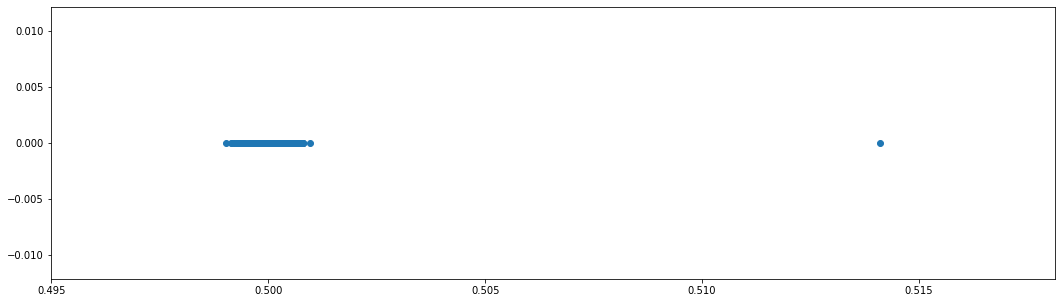

In [13]:
_, axes = plt.subplots(figsize=(18, 5))
plt.scatter(df['target'], [0 for _ in range(len(df['target']))])

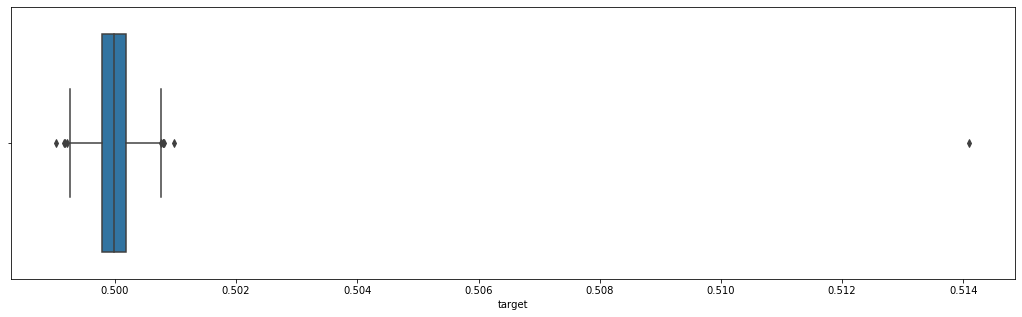

In [14]:
_, axes = plt.subplots(figsize=(18, 5))
sns.boxplot(df['target'], ax=axes)

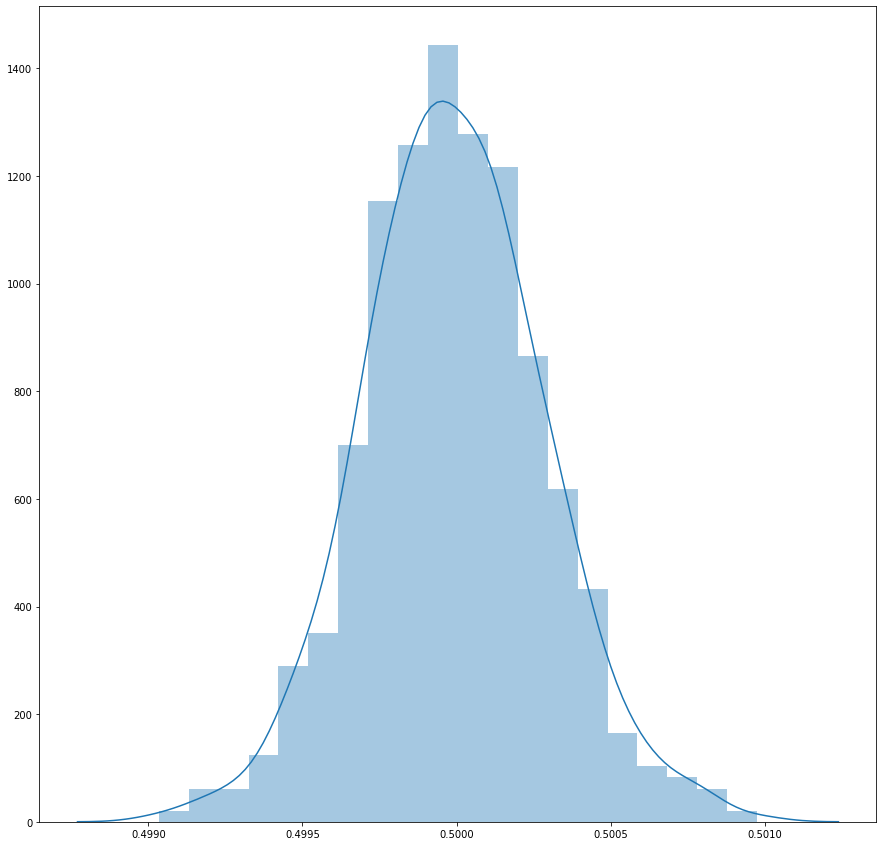

In [15]:
plt.figure(figsize=(15, 15))
sns.distplot(df['target'].values[1:])

----- Data Statistics -----
Share for value "black": 0.571395712577054
Share for value "white": 0.428604287422946
---------------------------


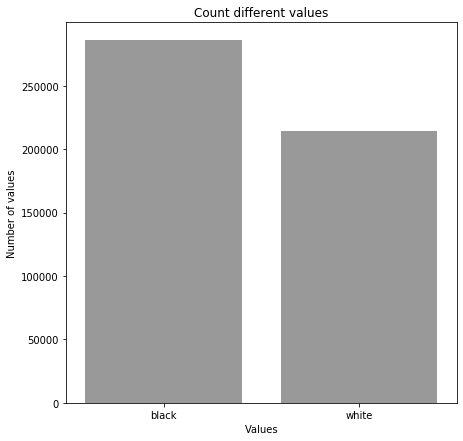

In [16]:
def task_3(counter, x, y, shari):
    first = random.choice(shari)
    second = random.choice(shari[:shari.index(first)] + shari[shari.index(first) + 1:])
    if second == 'white':
        counter.append(first) 
        x.append(first)
        y.append(second)

counter = stat_method(function=ft.partial(task_3, shari=['white', 'white', 'white', 'white', 'black', 'black', 'black', 'black']), iterations=1000000)
stats(counter['target'])
count_visualise(counter, type='one')

In [27]:
def generate_uniform(number_of_elements):
    return np.random.uniform(0, 1, (1, number_of_elements))


def run_experiment(number_of_elements=1000, train_size_ratio=0.1, data_generator=generate_uniform):
    data = data_generator(number_of_elements)
    train_index = int(round(number_of_elements * train_size_ratio))
    train_data, test_data = data[:, :train_index + 1], data[:, train_index - 1:]
    train_max, data_max = train_data.max(), data.max()
    tmp_example = None
    for index, example in enumerate(test_data.flatten()):
        if example >= train_max:
            tmp_example = example
            break
    return tmp_example == data_max


def make_choice(choice_runs=100000, train_ratios=np.linspace(0.1, 0.9, 50)):
    results = []
    for index, ratio in enumerate(train_ratios):
        success = 0 
        for _ in range(choice_runs):
            success += int(run_experiment(train_size_ratio=ratio))
        results.append(success)
    return train_ratios, results


def plot_results(ratios, results):
    plt.plot(ratios, results)

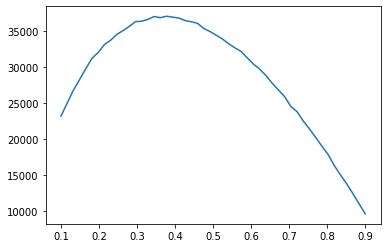

In [28]:
ratios, results = make_choice()
plot_results(ratios, results)